In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm

In [120]:
df = pd.read_csv('F:\WHO_stats.csv')
df.dtypes 

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [122]:
#To find out whether all the columns have values
df.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    41520
population     38316
dtype: int64

In [123]:
#total no of rows and columns
df.shape

(43776, 6)

In [125]:
#rows containing duplicate data
duplicate_rows = df[df.duplicated()]
print("no of duplicate rows:", duplicate_rows.shape)
#there are no duplicate values

no of duplicate rows: (0, 6)


In [126]:
#Detect if there is any missing data
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [128]:
#fill the missing data as 0
df.fillna(value=0, inplace = True)

In [129]:
#check if there is any missing data now after filling the value as 0
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [130]:
#change the object datatype to int datatype
df['population'] = df['population'].astype('int64')
df['suicides_no'] = df['suicides_no'].astype('int64')

In [131]:
df.dtypes

country        object
year            int64
sex            object
age            object
suicides_no     int64
population      int64
dtype: object

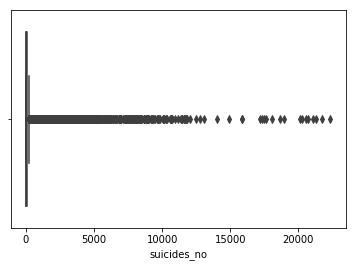

In [46]:
#visualising the outliers
sb.boxplot(x=df['suicides_no'])

In [132]:
# Find the interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                17.00
suicides_no         83.00
population     1041809.25
dtype: float64


In [133]:
#Eliminate the outliers - data which doesn't falls between this range
df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3+1.5 * IQR))).any(axis=1)]
df.shape

(34796, 6)

              country  year     sex          age  suicides_no  population
43020      Uzbekistan  2002  female  15-24 years          141     2627925
43083      Uzbekistan  2010  female   5-14 years           30     2627344
1252        Argentina  1995  female  55-74 years          134     2625900
41597  United Kingdom  1990  female    75+ years          154     2625749
37037           Spain  2015  female    75+ years          168     2624796
36661           Spain  1984  female  25-34 years           57     2624500
29680     Philippines  1999  female  55-74 years           21     2623906
29892          Poland  1984  female  15-24 years           99     2620500
41645  United Kingdom  1994  female    75+ years          148     2619957
7948           Canada  2001  female  55-74 years          161     2618587


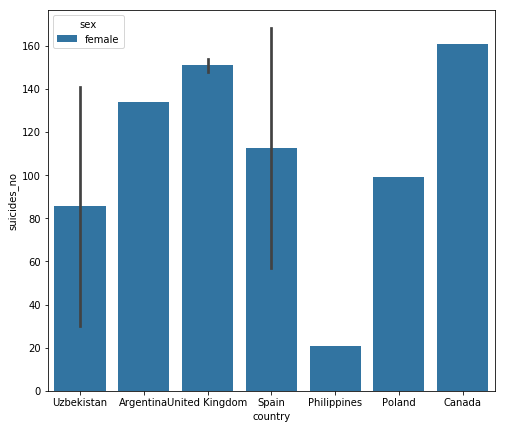

In [134]:
# barplot showing the suicides number classified based on sex for the 10 countries with largest population
df_suicides = df.nlargest(10,'population')
print(df_suicides)
plt.figure(figsize = [8,7])
sb.barplot(x='country', y='suicides_no', hue='sex', data=df_suicides)

Text(4.4, 14064.960000000001, 'Median- 4.00')

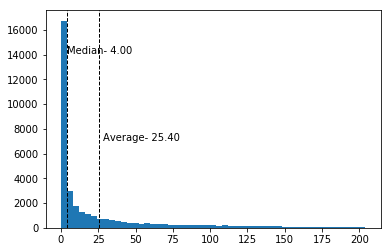

In [135]:
#plot a histogram which shows the distribution of values in suicide_no column
bin_edges = np.arange(0, df['suicides_no'].max(), 4)
plt.hist(data = df, x = 'suicides_no', bins = bin_edges)
plt.axvline(df['suicides_no'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['suicides_no'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df['suicides_no'].mean()*1.1, max_ylim*0.4, 'Average- {:.2f}'.format(df['suicides_no'].mean()))
plt.text(df['suicides_no'].median()*1.1, max_ylim*0.8, 'Median- {:.2f}'.format(df['suicides_no'].median()))

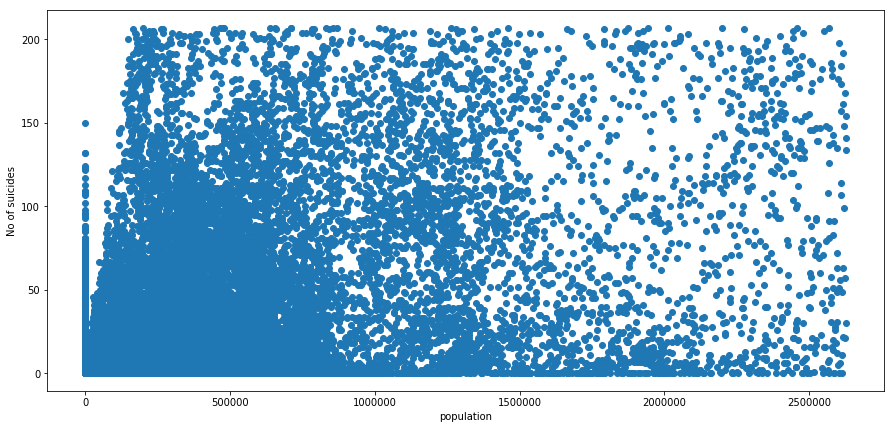

In [136]:
# Plot a scatter plot which shows the correlation between suicides and population
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(df['population'], df['suicides_no'])
ax.set_xlabel('population')
ax.set_ylabel('No of suicides')
plt.show()